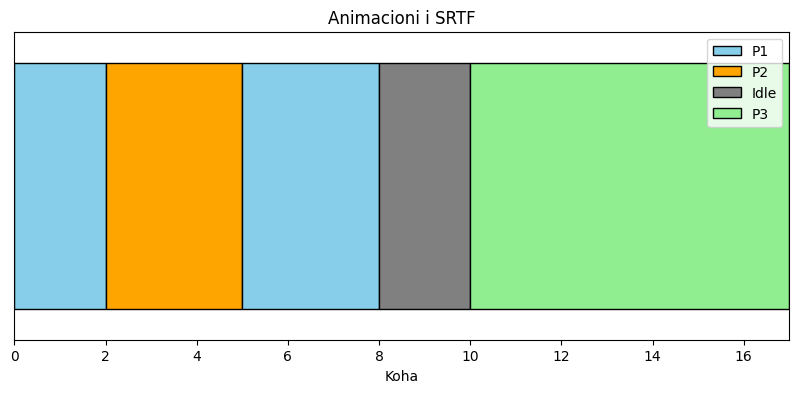

In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

schedule = [
    ("P1", 0, 2),
    ("P2", 2, 3),
    ("P1", 5, 3),
    ("Idle", 8, 2),
    ("P3", 10, 7),
]

koha_totale = max(k_fillimit + k_gjatja for _, k_fillimit, k_gjatja in schedule)

fig, ax = plt.subplots(figsize=(10, 4))
ax.set_xlim(0, koha_totale)
ax.set_ylim(0, 1)
ax.set_xlabel("Koha")
ax.set_yticks([])
ax.set_title("Animacioni i SRTF")

ngjyrat = {
    "P1": "skyblue",
    "P2": "orange",
    "P3": "lightgreen",
    "Idle": "grey",
}

shtyllat = []

def init():
    ax.clear()
    ax.set_xlim(0, koha_totale)
    ax.set_ylim(0, 1)
    ax.set_xlabel("Koha")
    ax.set_yticks([])
    ax.set_title("Animacioni i SRTF")
    return shtyllat

def update(kuadri):
    ax.clear()
    ax.set_xlim(0, koha_totale)
    ax.set_ylim(0, 1)
    ax.set_xlabel("Koha")
    ax.set_yticks([])
    ax.set_title("Animacioni i SRTF")

    koha_aktuale = kuadri
    for procesi, k_fillimit, k_gjatja in schedule:
        if k_fillimit + k_gjatja <= koha_aktuale:
            ax.barh(0.5, k_gjatja, left=k_fillimit, color=ngjyrat[procesi], edgecolor="black", label=procesi)
        elif k_fillimit <= koha_aktuale < k_fillimit + k_gjatja:
            kaluar = koha_aktuale - k_fillimit
            ax.barh(0.5, kaluar, left=k_fillimit, color=ngjyrat[procesi], edgecolor="black", label=procesi)
            break

    dorezat, etiketat = ax.get_legend_handles_labels()
    unike = dict(zip(etiketat, dorezat))
    ax.legend(unike.values(), unike.keys(), loc="upper right")

anim = FuncAnimation(fig, update, frames=range(koha_totale + 1), init_func=init, blit=False, interval=500)
anim.save("srtf_animation.gif", writer="pillow")
plt.show()
